# Постановка задачи

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import math
import scipy as sc

# Задание А

In [2]:
def B(k,i):
    
    def f(t):
        prod = 1
        for j in range (0,k+1):
            prod = prod*(t+j)
        ff = prod/(t+i)
        return ff
        
    integral = sc.integrate.quad(f, 0, 1)[0]
    
    B = ((-1)**i)*integral/(math.factorial(i) * math.factorial(k-i))
    
    return B

In [3]:
print('B(0,0) = ',B(0,0).as_integer_ratio()[0], '/', B(0,0).as_integer_ratio()[1])
print('B(1,0) = ',B(1,0).as_integer_ratio()[0], '/', B(1,0).as_integer_ratio()[1])
print('B(1,1) = ',B(1,1).as_integer_ratio()[0], '/', B(1,1).as_integer_ratio()[1])
print('B(2,0) = ',round(B(2,0)*24), '/ 24')
print('B(2,1) = ',round(B(2,1)*24), '/ 24')
print('B(2,2) = ',round(B(2,2)*24), '/ 24')
print('B(3,0) = ',round(B(3,0)*24), '/ 24')
print('B(3,1) = ',round(B(3,1)*24), '/ 24')
print('B(3,2) = ',round(B(3,2)*24), '/ 24')
print('B(3,3) = ',round(B(3,3)*24), '/ 24')

B(0,0) =  1 / 1
B(1,0) =  3 / 2
B(1,1) =  -1 / 2
B(2,0) =  46 / 24
B(2,1) =  -32 / 24
B(2,2) =  10 / 24
B(3,0) =  55 / 24
B(3,1) =  -59 / 24
B(3,2) =  37 / 24
B(3,3) =  -9 / 24


# Задание Б

In [4]:
def b(k,i):
    
    def f(t):
        prod = 1
        for j in range (0,k+1):
            prod = prod*(t+j-1)
        ff = prod/(t+i-1)
        return ff
        
    integral = sc.integrate.quad(f, 0, 1)[0]
    
    b = ((-1)**i)*integral/(math.factorial(i) * math.factorial(k-i))
    
    return b

In [5]:
print('b(3,0) = ',round(b(3,0)*24), '/ 24')
print('b(3,1) = ',round(b(3,1)*24), '/ 24')
print('b(3,2) = ',round(b(3,2)*24), '/ 24')
print('b(3,3) = ',round(b(3,3)*24), '/ 24')

b(3,0) =  9 / 24
b(3,1) =  19 / 24
b(3,2) =  -5 / 24
b(3,3) =  1 / 24


# Задание В

In [6]:
def γ(i):
    
    def f(t):
        prod = 1
        for j in range (1,i+1):
            prod = prod*(t+j-1)
        return prod
        
    integral = sc.integrate.quad(f, 0, 1)[0]
    
    γ = integral / math.factorial(i)
    
    return γ

In [7]:
print('γ(0) = ',round(γ(0)*1440), '/ 1440')
print('γ(1) = ',round(γ(1)*1440), '/ 1440')
print('γ(2) = ',round(γ(2)*1440), '/ 1440')
print('γ(3) = ',round(γ(3)*1440), '/ 1440')
print('γ(4) = ',round(γ(4)*1440), '/ 1440')
print('γ(5) = ',round(γ(5)*1440), '/ 1440')

γ(0) =  1440 / 1440
γ(1) =  720 / 1440
γ(2) =  600 / 1440
γ(3) =  540 / 1440
γ(4) =  502 / 1440
γ(5) =  475 / 1440


# Задание Г

In [8]:
def γ_(i):
    
    def f(t):
        prod = 1
        for j in range (1,i+1):
            prod = prod*(t+j-2)
        return prod
        
    integral = sc.integrate.quad(f, 0, 1)[0]
    
    γ_ = integral / math.factorial(i)
    
    return γ_

In [9]:
print('γ_(0) = ',round(γ_(0)*720), '/ 720')
print('γ_(1) = ',round(γ_(1)*720), '/ 720')
print('γ_(2) = ',round(γ_(2)*720), '/ 720')
print('γ_(3) = ',round(γ_(3)*720), '/ 720')
print('γ_(4) = ',round(γ_(4)*720), '/ 720')
print('γ_(5) = ',round(γ_(5)*720), '/ 720')

γ_(0) =  720 / 720
γ_(1) =  -360 / 720
γ_(2) =  -60 / 720
γ_(3) =  -30 / 720
γ_(4) =  -19 / 720
γ_(5) =  -14 / 720


# Задание Д

## Аналитическое решение

In [10]:
t = sp.symbols('t')
y = sp.Function('y')
equation = sp.Eq(y(t).diff(t), 2*t*(t**2 + y(t)))
sp.dsolve(equation, ics={y(0): 0})

Eq(y(t), -t**2 + exp(t**2) - 1)

In [11]:
def u_(x):
    return (math.exp(x**2) - x**2 - 1)

## Численное решение методом Адамса

In [12]:
def f(x,u):
    return 2*x*(x**2 + u)

In [13]:
a = 0
b = 2
N_ = 30, 50, 100, 500, 1000

N =  30 : Error =  3.239604301e-08
N =  50 : Error =  1.52652485e-09
N =  100 : Error =  2.3962e-11
N =  500 : Error =  1.69e-15
N =  1000 : Error =  1.2e-16


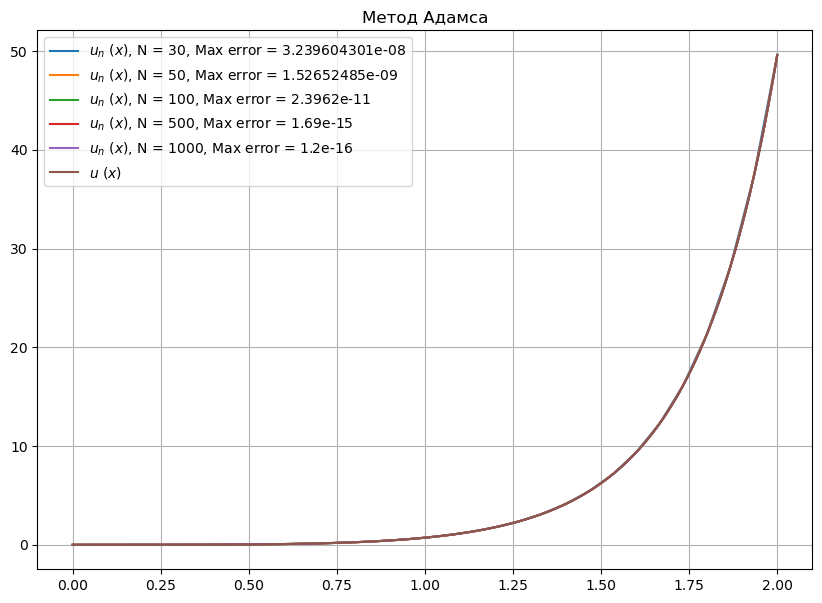

In [14]:
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    x = np.zeros(N+1)
    
    for i in range(0,N+1):
        x[i] = h*i
        
    u = np.zeros(N+1)
    u_real = np.zeros(N+1)
    E = np.zeros(N+1)
    u[0]=0
    u_ln = np.empty(N+1)
    
    for n in range (0,3):
        
        k0 = f(x[n],u[n])
        k1 = f(x[n] + 0.5*h , u[n] + 0.5*h*k0)
        k2 = f(x[n] + 0.5*h , u[n] + 0.5*h*k1)
        k3 = f(x[n] + h , u[n] + h * k2)

        u[n+1] = u[n] +  h/6 * (k0 + 2*k1 + 2*k2 + k3)
        u_real[n+1] = u_(x[n+1])
        E[n+1] = abs(u_real[n+1] - u[n+1])
        
    for n in range (3,N):
        
        u_real[n+1] = u_(x[n+1])
        
        u_buf = u[n] + h/24 * (55*f(x[n],u[n]) - 59*f(x[n-1],u[n-1]) + 
                               37*f(x[n-2],u[n-2]) - 9*f(x[n-3],u[n-3]))
        
        u[n+1] = u[n] + h/24 * (9*f(x[n+1],u_buf) + 19*f(x[n],u[n]) - 
                               5*f(x[n-1],u[n-1]) + f(x[n-2],u[n-2]))
        
        while abs(u[n+1] - u_buf) > 0.0001:
            
            u_buf = u[n+1]
            
            u[n+1] = u[n] + h/24 * (9*f(x[n+1],u_buf) + 19*f(x[n],u[n]) - 
                               5*f(x[n-1],u[n-1]) + f(x[n-2],u[n-2]))
        
    print('N = ', str(N), ': Error = ', str(round(max(E),17)))
    plt.plot(x,u,label='$u_n$ $(x)$'+', N = '+str(N)+', Max error = '+str(round(max(E),17)))
    
plt.plot(x,u_real,label='$u$ $(x)$')
plt.legend()
plt.title('Метод Адамса')
plt.grid()

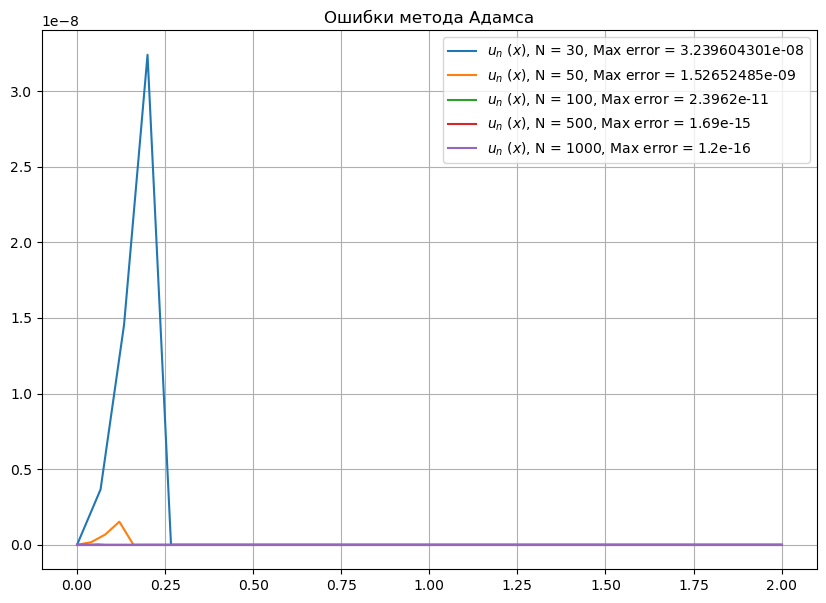

In [15]:
plt.figure(figsize = (10,7))

for N in N_:
    h = (b-a)/N
    x = np.zeros(N+1)
    
    for i in range(0,N+1):
        x[i] = h*i
        
    u = np.zeros(N+1)
    u_real = np.zeros(N+1)
    E = np.zeros(N+1)
    u[0]=0
    u_ln = np.empty(N+1)
    
    for n in range (0,3):
        
        k0 = f(x[n],u[n])
        k1 = f(x[n] + 0.5*h , u[n] + 0.5*h*k0)
        k2 = f(x[n] + 0.5*h , u[n] + 0.5*h*k1)
        k3 = f(x[n] + h , u[n] + h * k2)

        u[n+1] = u[n] +  h/6 * (k0 + 2*k1 + 2*k2 + k3)
        u_real[n+1] = u_(x[n+1])
        E[n+1] = abs(u_real[n+1] - u[n+1])
        
    for n in range (3,N):
        
        u_real[n+1] = u_(x[n+1])
        
        u_buf = u[n] + h/24 * (55*f(x[n],u[n]) - 59*f(x[n-1],u[n-1]) + 
                               37*f(x[n-2],u[n-2]) - 9*f(x[n-3],u[n-3]))
        
        u[n+1] = u[n] + h/24 * (9*f(x[n+1],u_buf) + 19*f(x[n],u[n]) - 
                               5*f(x[n-1],u[n-1]) + f(x[n-2],u[n-2]))
        
        while abs(u[n+1] - u_buf) > 0.0001:
            
            u_buf = u[n+1]
            
            u[n+1] = u[n] + h/24 * (9*f(x[n+1],u_buf) + 19*f(x[n],u[n]) - 
                               5*f(x[n-1],u[n-1]) + f(x[n-2],u[n-2]))

    plt.plot(x,E,label='$u_n$ $(x)$'+', N = '+str(N)+', Max error = '+str(round(max(E),17)))
    
plt.legend()
plt.title('Ошибки метода Адамса')
plt.grid()

# Задание Е

## Явный метод

In [16]:
a_0 = sp.symbols('a_0')
a_1 = sp.symbols('a_1')
b_0 = sp.symbols('b_0')
b_1 = sp.symbols('b_1')
equations = [1+a_1+a_0, 2+a_1-b_0-b_1, 4+a_1-2*b_1, 8+a_1-3*b_1]
sp.solve(equations,a_0,a_1,b_0,b_1)

{a_0: -5, a_1: 4, b_0: 2, b_1: 4}

## Неявный метод

In [17]:
a_0 = sp.symbols('a_0')
a_1 = sp.symbols('a_1')
b_0 = sp.symbols('b_0')
b_1 = sp.symbols('b_1')
b_2 = sp.symbols('b_2')
equations = [1+a_1+a_0, 2+a_1-b_0-b_1-b_2, 4+a_1-2*b_1-4*b_2, 
             8+a_1-3*b_1-12*b_2, 16+a_1-4*b_1-32*b_2]
sp.solve(equations,a_0,a_1,b_0,b_1,b_2)

{a_0: -1, a_1: 0, b_0: 1/3, b_1: 4/3, b_2: 1/3}

# Выводы